# Jaccard's Metric

In [264]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_covtype
from sklearn.metrics import jaccard_score

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard
from sklearn.metrics import pairwise_distances_chunked
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Data & Preprocessing

In [265]:
data = fetch_covtype()
df = pd.DataFrame(data = data.data.astype(int))

target = ['cover_type']
wildcols = ['wilderness_'+str(i) for i in range(0,4)]
soilcols = ['soil_'+str(i) for i in range(0,40)]

X = pd.DataFrame(data = pd.concat([pd.DataFrame(data.target),df.iloc[:,-44:]],axis=1))
X.columns = target + wildcols + soilcols

X_sample = X.sample(1000)

## View a Sample

In [266]:
X.iloc[0:2,:]

,cover_type,wilderness_0,wilderness_1,wilderness_2,wilderness_3,soil_0,soil_1,soil_2,soil_3,soil_4,...,soil_30,soil_31,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39
0,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Simple Example

In [267]:
x = [[1,1,1],[1,0,1],[0,0,0]]
print(x)

[[1, 1, 1], [1, 0, 1], [0, 0, 0]]


In [268]:
jaccard(x[0],x[1])

0.3333333333333333

In [269]:
jaccard_score(x[0],x[1])

0.6666666666666666

In [270]:
jaccard(x[0],x[2])

1.0

In [271]:
jaccard_score(x[0],x[2])

0.0

In [272]:
pairwise_distances(x, metric = jaccard)

array([[0.        , 0.33333333, 1.        ],
       [0.33333333, 0.        , 1.        ],
       [1.        , 1.        , 0.        ]])

# Hierarchical Clustering

+ Distance Matrix
+ Dendrogram

In [273]:
%%time
D = pairwise_distances(X_sample, metric = jaccard)
D

Wall time: 17.5 s


array([[0. , 1. , 0. , ..., 1. , 1. , 0.5],
       [1. , 0. , 1. , ..., 1. , 0.5, 1. ],
       [0. , 1. , 0. , ..., 1. , 1. , 0.5],
       ...,
       [1. , 1. , 1. , ..., 0. , 1. , 1. ],
       [1. , 0.5, 1. , ..., 1. , 0. , 1. ],
       [0.5, 1. , 0.5, ..., 1. , 1. , 0. ]])

Dendrogram

<ipython-input-274-fbd2d48d287c>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(D, 'average')


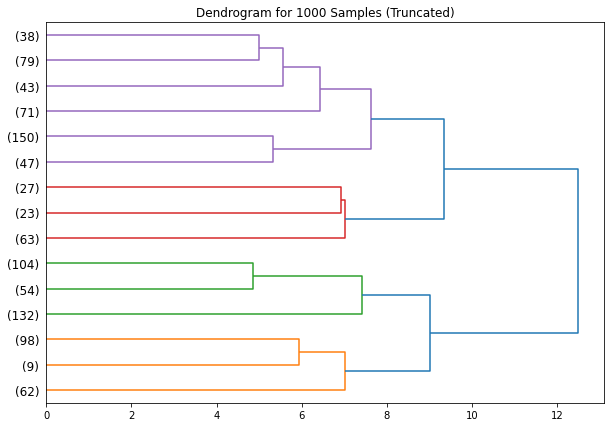

In [274]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_sample)

linked = linkage(D, 'average')

labelList = clustering.labels_

plt.figure(figsize=(10, 7))

dendrogram(linked,
           p=15,
           orientation='right',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp')

plt.title('Dendrogram for 1000 Samples (Truncated)')
plt.show()

# Comparison

In [285]:
target_type = X[X.cover_type==4].iloc[0,1:][soilcols]

In [286]:
df = X[soilcols]

In [288]:
%%time
from functools import partial
import multiprocessing as mp

partial_jaccard = partial(jaccard_score, target_type)

with mp.Pool() as pool:
    results = pool.map(partial_jaccard, [row for row in df.values])

Wall time: 2min 50s


## Results

In [282]:
pd.DataFrame(data = {'Jaccards Similarity Score': pd.Series(results).value_counts().index,
                     'Count': pd.Series(results).value_counts().values})

,Jaccards Similarity Score,Count
0,0.0,544044
1,1.0,36968


# END